## Data Modelling

### ODI Batting Data

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the cleaned dataset
file_path = "Data/Final_Batting.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,Player Name,Born,Batting Style,Bowling Style,Playing Role,Innings_ODI_batting,Innings_T20_batting,Innings_Test_batting,NO_ODI,NO_T20,...,T20_Matches,Test_Matches,Country,SpanStart_ODI,SpanStart_Test,SpanStart_T20,Bowling Hand,AgeStart_ODI,AgeStart_Test,AgeStart_T20
0,A Athanaze,1998-12-07,Left hand Bat,Spinner,Batter,10,1,13,0,1,...,1,7,WI,2023,2023,2024,Right Hand,24.643836,24.643836,25.643836
1,A Balbirnie,1990-12-28,Right hand Bat,Spinner,Batter,102,106,18,8,4,...,110,9,IRE,2010,2018,2015,Right Hand,19.586301,27.586301,24.586301
2,A Dananjaya,1993-10-04,Left hand Bat,Spinner,Allrounder,30,16,10,6,8,...,33,6,SL,2012,2018,2012,Right Hand,18.819178,24.819178,18.819178
3,A Symonds,1975-06-09,Right hand Bat,Spinner,Allrounder,161,11,41,33,4,...,14,26,AUS,1998,2004,2005,Right Hand,23.080000,29.080000,30.080000
4,AB Barath,1990-04-14,Right hand Bat,Spinner,Batter,14,2,28,1,0,...,2,15,WI,2010,2009,2010,Right Hand,20.290411,19.290411,20.290411


In [4]:
df.columns

Index(['Player Name', 'Born', 'Batting Style', 'Bowling Style', 'Playing Role',
       'Innings_ODI_batting', 'Innings_T20_batting', 'Innings_Test_batting',
       'NO_ODI', 'NO_T20', 'NO_Test', 'Runs_ODI_batting', 'Runs_T20_batting',
       'Runs_Test_batting', 'HS_ODI', 'HS_T20', 'HS_Test', 'Ave_ODI_batting',
       'Ave_T20_batting', 'Ave_Test_batting', 'BF_ODI', 'BF_T20',
       'SR_ODI_batting', 'SR_T20_batting', '100_ODI', '100_T20', '100_Test',
       '50_ODI', '50_T20', '50_Test', '0_ODI', '0_T20', '0_Test',
       'Innings_ODI_bowling', 'Innings_T20_bowling', 'Innings_Test_bowling',
       'Balls_ODI', 'Balls_Test', 'Runs_ODI_bowling', 'Runs_T20_bowling',
       'Runs_Test_bowling', 'Wickets_ODI', 'Wickets_T20', 'Wickets_Test',
       'BBI_ODI', 'BBI_T20', 'BBI_Test', 'Ave_ODI_bowling', 'Ave_T20_bowling',
       'Ave_Test_bowling', 'Econ_ODI', 'Econ_T20', 'Econ_Test',
       'SR_ODI_bowling', 'SR_T20_bowling', 'SR_Test_bowling', '4_ODI', '4_T20',
       '5_ODI', '5_T20', '5_Te

In [5]:
bowl_cols = ['Bowling Style', 'Innings_ODI_bowling', 'Innings_T20_bowling', 'Innings_Test_bowling',
       'Balls_ODI', 'Balls_Test', 'Runs_ODI_bowling', 'Runs_T20_bowling',
       'Runs_Test_bowling', 'Wickets_ODI', 'Wickets_T20', 'Wickets_Test',
       'BBI_ODI', 'BBI_T20', 'BBI_Test', 'Ave_ODI_bowling', 'Ave_T20_bowling',
       'Ave_Test_bowling', 'Econ_ODI', 'Econ_T20', 'Econ_Test',
       'SR_ODI_bowling', 'SR_T20_bowling', 'SR_Test_bowling', '4_ODI', '4_T20',
       '5_ODI', '5_T20', '5_Test', '10_Test', 'Bowling Hand']

In [6]:
# Dropping Bowling stats
df_bat = df.drop(columns=bowl_cols)

In [7]:
odi_cols = [column for column in df_bat.columns if "ODI" in column and 'Ave_ODI_batting' != column] 

In [8]:
odi_cols

['Innings_ODI_batting',
 'NO_ODI',
 'Runs_ODI_batting',
 'HS_ODI',
 'BF_ODI',
 'SR_ODI_batting',
 '100_ODI',
 '50_ODI',
 '0_ODI',
 'ODI_Matches',
 'SpanStart_ODI',
 'AgeStart_ODI']

In [9]:
# Dropping Bowling stats
df_bat_odi = df_bat.drop(columns=odi_cols)

In [10]:
df_bat_odi.columns

Index(['Player Name', 'Born', 'Batting Style', 'Playing Role',
       'Innings_T20_batting', 'Innings_Test_batting', 'NO_T20', 'NO_Test',
       'Runs_T20_batting', 'Runs_Test_batting', 'HS_T20', 'HS_Test',
       'Ave_ODI_batting', 'Ave_T20_batting', 'Ave_Test_batting', 'BF_T20',
       'SR_T20_batting', '100_T20', '100_Test', '50_T20', '50_Test', '0_T20',
       '0_Test', 'T20_Matches', 'Test_Matches', 'Country', 'SpanStart_Test',
       'SpanStart_T20', 'AgeStart_Test', 'AgeStart_T20'],
      dtype='object')

In [11]:
df_bat_odi.drop(columns=["Born"], inplace=True)

In [12]:
df_bat_odi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player Name           350 non-null    object 
 1   Batting Style         350 non-null    object 
 2   Playing Role          350 non-null    object 
 3   Innings_T20_batting   350 non-null    int64  
 4   Innings_Test_batting  350 non-null    int64  
 5   NO_T20                350 non-null    int64  
 6   NO_Test               350 non-null    int64  
 7   Runs_T20_batting      350 non-null    int64  
 8   Runs_Test_batting     350 non-null    int64  
 9   HS_T20                350 non-null    int64  
 10  HS_Test               350 non-null    int64  
 11  Ave_ODI_batting       350 non-null    float64
 12  Ave_T20_batting       350 non-null    float64
 13  Ave_Test_batting      350 non-null    float64
 14  BF_T20                350 non-null    int64  
 15  SR_T20_batting        3

In [13]:
num_features = [feature for feature in df_bat_odi.columns if df_bat_odi[feature].dtype != 'O']
print(num_features)
df_bat_odi[num_features].head()

['Innings_T20_batting', 'Innings_Test_batting', 'NO_T20', 'NO_Test', 'Runs_T20_batting', 'Runs_Test_batting', 'HS_T20', 'HS_Test', 'Ave_ODI_batting', 'Ave_T20_batting', 'Ave_Test_batting', 'BF_T20', 'SR_T20_batting', '100_T20', '100_Test', '50_T20', '50_Test', '0_T20', '0_Test', 'T20_Matches', 'Test_Matches', 'SpanStart_Test', 'SpanStart_T20', 'AgeStart_Test', 'AgeStart_T20']


,Innings_T20_batting,Innings_Test_batting,NO_T20,NO_Test,Runs_T20_batting,Runs_Test_batting,HS_T20,HS_Test,Ave_ODI_batting,Ave_T20_batting,...,50_T20,50_Test,0_T20,0_Test,T20_Matches,Test_Matches,SpanStart_Test,SpanStart_T20,AgeStart_Test,AgeStart_T20
0,1,13,1,0,6,310,6,82,28.80,0.00,...,0,1,0,1,1,7,2023,2024,24.643836,25.643836
1,106,18,4,1,2392,401,83,95,32.00,23.45,...,12,4,6,3,110,9,2018,2015,27.586301,24.586301
2,16,10,8,2,65,135,11,43,12.12,8.12,...,0,0,2,3,33,6,2018,2012,24.819178,18.819178
3,11,41,4,5,337,1462,85,162,39.75,48.14,...,2,10,2,4,14,26,2004,2005,29.080000,30.080000
4,2,28,0,0,23,657,15,104,30.30,11.50,...,0,4,0,2,2,15,2009,2010,19.290411,20.290411


#### Discrete Features

In [14]:
discrete_features = [feature for feature in num_features if len(df_bat_odi[feature].unique()) < 25]
print(discrete_features)

['100_T20', '0_T20', '0_Test', 'SpanStart_T20']


100_T20
0    0.922857
1    0.048571
2    0.014286
3    0.005714
4    0.002857
5    0.005714
Name: Ave_ODI_batting, dtype: float64
100_T20
0    323
1     17
2      5
3      2
5      2
4      1
Name: count, dtype: int64


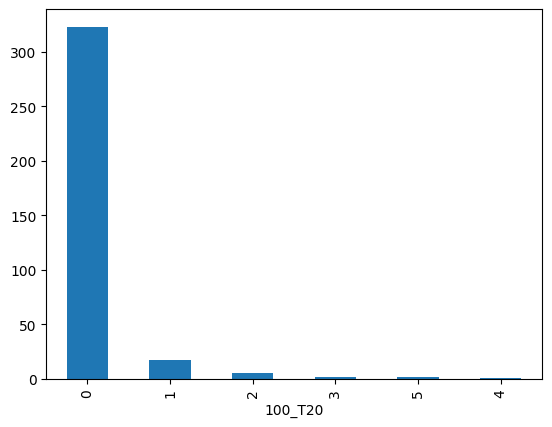

0_T20
0     0.337143
1     0.185714
2     0.174286
3     0.071429
4     0.062857
5     0.048571
6     0.042857
7     0.031429
8     0.014286
9     0.008571
10    0.005714
11    0.002857
12    0.005714
13    0.008571
Name: Ave_ODI_batting, dtype: float64
0_T20
0     118
1      65
2      61
3      25
4      22
5      17
6      15
7      11
8       5
9       3
13      3
12      2
10      2
11      1
Name: count, dtype: int64


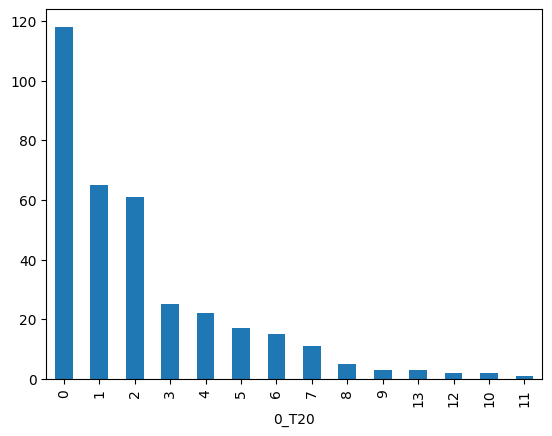

0_Test
0     0.220000
1     0.185714
2     0.125714
3     0.097143
4     0.074286
5     0.040000
6     0.040000
7     0.034286
8     0.037143
9     0.028571
10    0.022857
11    0.017143
12    0.020000
13    0.011429
14    0.025714
15    0.011429
17    0.002857
19    0.002857
22    0.002857
Name: Ave_ODI_batting, dtype: float64
0_Test
0     77
1     65
2     44
3     34
4     26
5     14
6     14
8     13
7     12
9     10
14     9
10     8
12     7
11     6
15     4
13     4
17     1
22     1
19     1
Name: count, dtype: int64


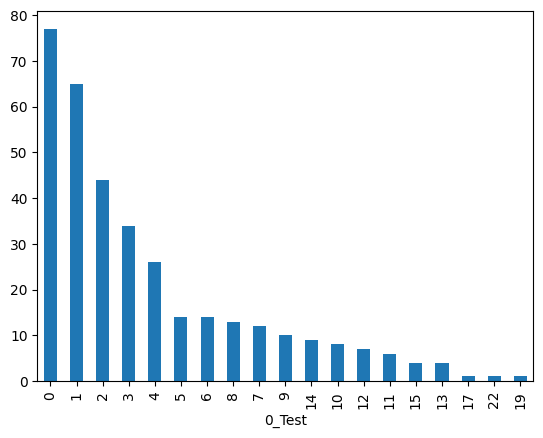

SpanStart_T20
2005    0.051429
2006    0.117143
2007    0.082857
2008    0.048571
2009    0.062857
2010    0.082857
2011    0.065714
2012    0.057143
2013    0.034286
2014    0.034286
2015    0.040000
2016    0.054286
2017    0.045714
2018    0.034286
2019    0.060000
2020    0.020000
2021    0.048571
2022    0.037143
2023    0.011429
2024    0.011429
Name: Ave_ODI_batting, dtype: float64
SpanStart_T20
2006    41
2010    29
2007    29
2011    23
2009    22
2019    21
2012    20
2016    19
2005    18
2021    17
2008    17
2017    16
2015    14
2022    13
2018    12
2014    12
2013    12
2020     7
2024     4
2023     4
Name: count, dtype: int64


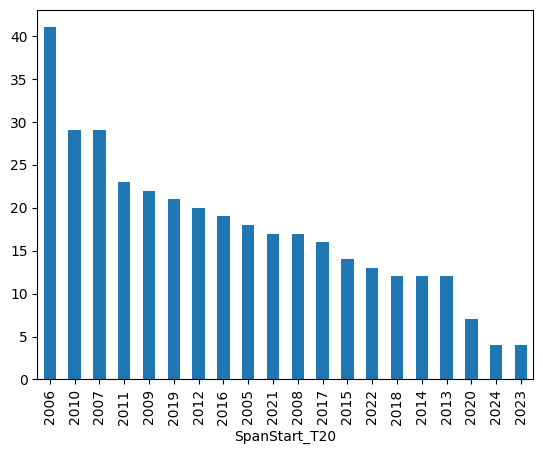

In [15]:
for feature in discrete_features:
    data = df_bat_odi.copy() 
    print(data.groupby(feature)['Ave_ODI_batting'].count() / len(data))
    print(data[feature].value_counts())
    data[feature].value_counts().plot.bar()
    plt.show()

100_T20
0    0.889040
1    0.071363
2    0.020026
3    0.008325
4    0.002627
5    0.008619
Name: Ave_ODI_batting, dtype: float64


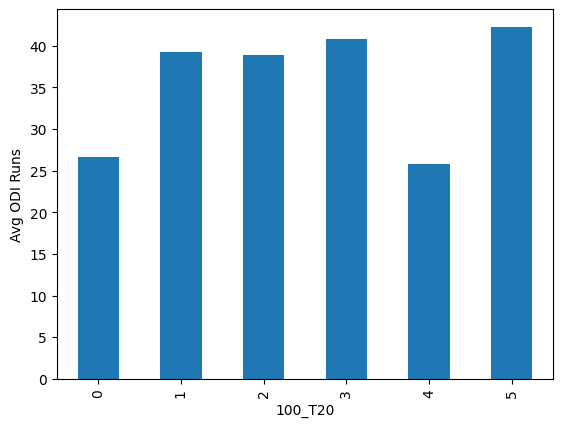

0_T20
0     0.292834
1     0.183884
2     0.175844
3     0.072753
4     0.070900
5     0.056364
6     0.056061
7     0.039802
8     0.015196
9     0.009053
10    0.007507
11    0.002243
12    0.008009
13    0.009551
Name: Ave_ODI_batting, dtype: float64


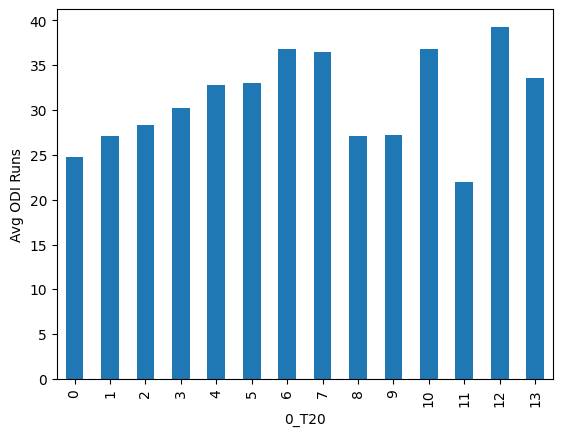

0_Test
0     0.184004
1     0.160423
2     0.120286
3     0.098036
4     0.081276
5     0.045961
6     0.043382
7     0.043889
8     0.036848
9     0.035563
10    0.028143
11    0.022954
12    0.027716
13    0.011880
14    0.033685
15    0.014554
17    0.004382
19    0.003186
22    0.003831
Name: Ave_ODI_batting, dtype: float64


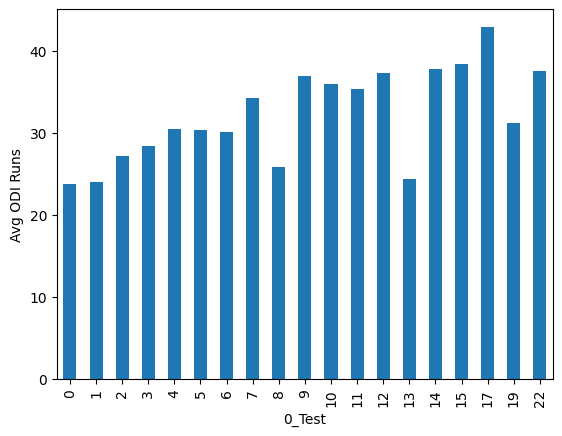

SpanStart_T20
2005    0.060538
2006    0.125111
2007    0.090071
2008    0.040483
2009    0.057974
2010    0.079116
2011    0.067180
2012    0.052324
2013    0.028037
2014    0.027008
2015    0.036430
2016    0.068051
2017    0.054282
2018    0.028694
2019    0.064225
2020    0.017174
2021    0.051262
2022    0.033059
2023    0.008476
2024    0.010505
Name: Ave_ODI_batting, dtype: float64


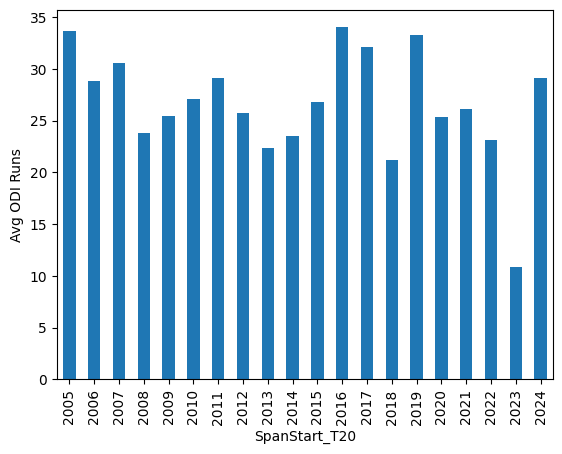

In [38]:
for feature in discrete_features:
    data = df_bat_odi.copy()
    
    print(data.groupby(feature)['Ave_ODI_batting'].sum() / data['Ave_ODI_batting'].sum())
    data.groupby(feature)['Ave_ODI_batting'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Avg ODI Runs')
    plt.show()

##### Observation:
1. Players having more centuries in T20s have High batting Averages in ODI
2. Average ODI runs is almost same for the players despite their seniority
3. Runs decreases as players get out in ducks more

#### Continuous Features

In [16]:
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print(continuous_features)

['Innings_T20_batting', 'Innings_Test_batting', 'NO_T20', 'NO_Test', 'Runs_T20_batting', 'Runs_Test_batting', 'HS_T20', 'HS_Test', 'Ave_ODI_batting', 'Ave_T20_batting', 'Ave_Test_batting', 'BF_T20', 'SR_T20_batting', '100_Test', '50_T20', '50_Test', 'T20_Matches', 'Test_Matches', 'SpanStart_Test', 'AgeStart_Test', 'AgeStart_T20']


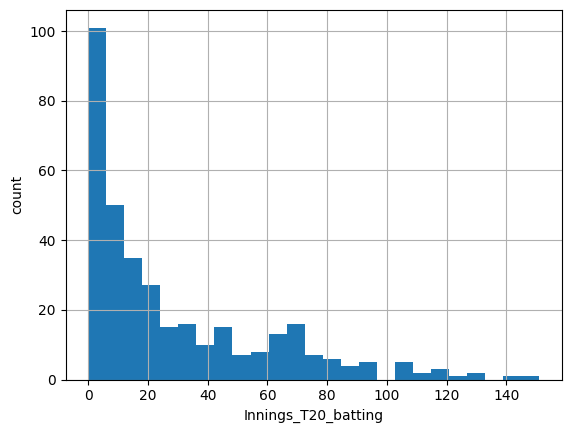

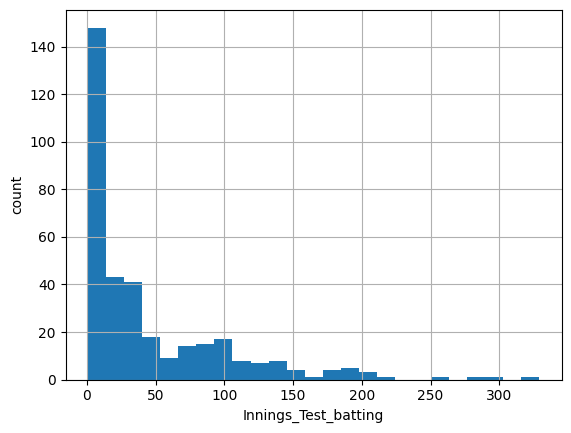

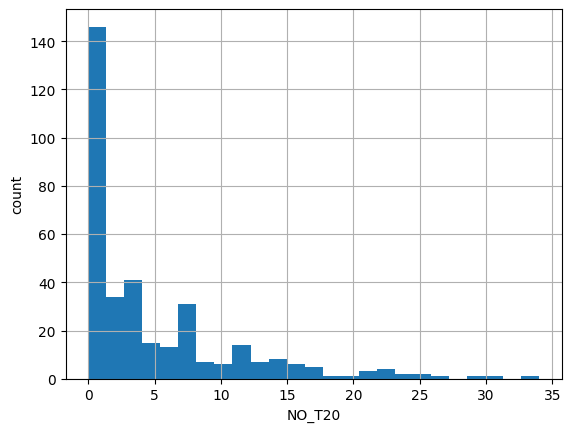

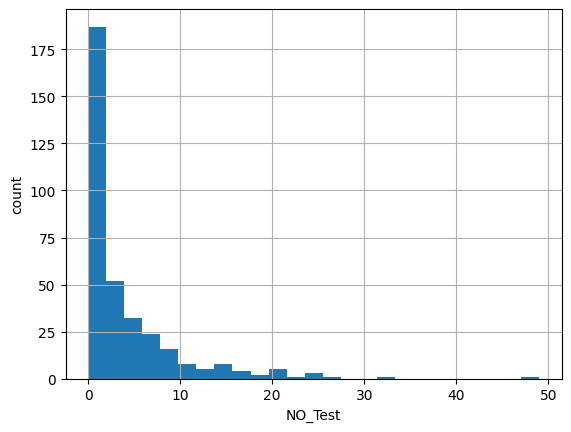

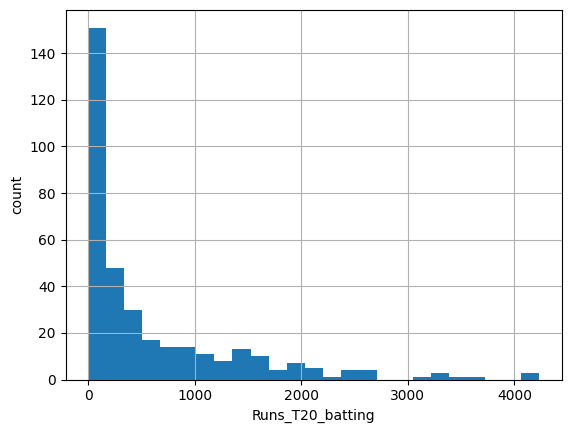

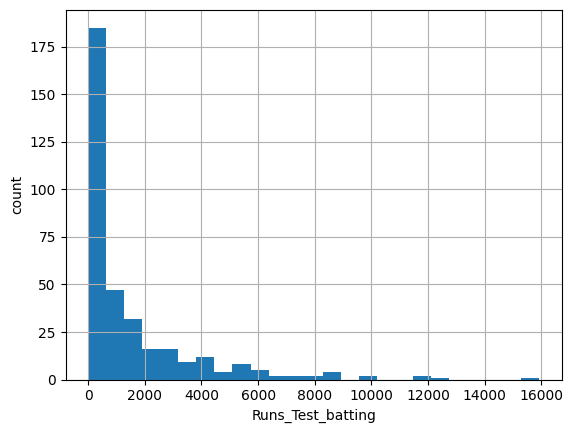

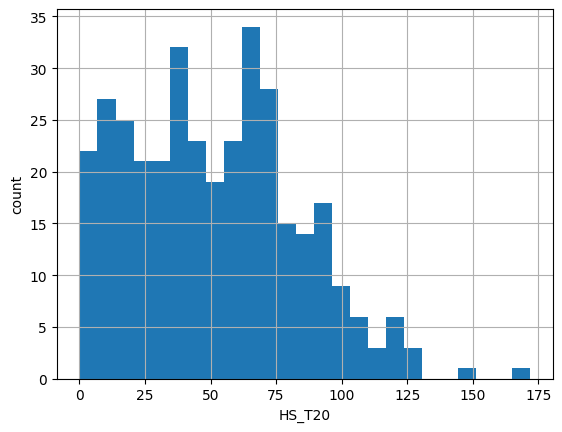

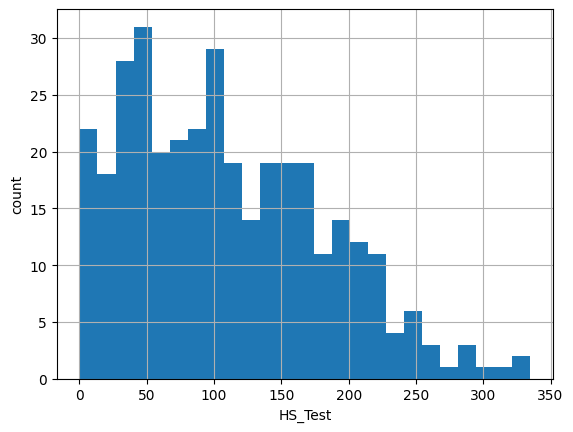

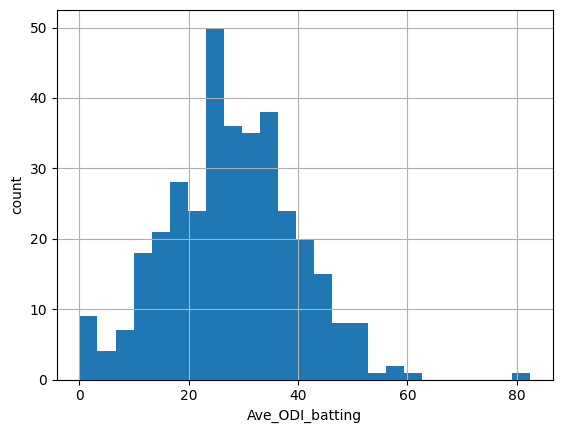

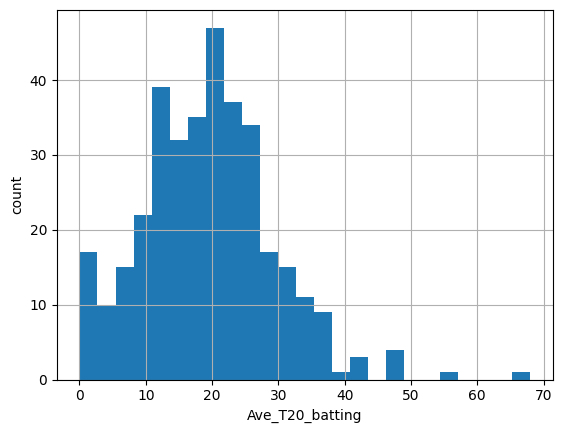

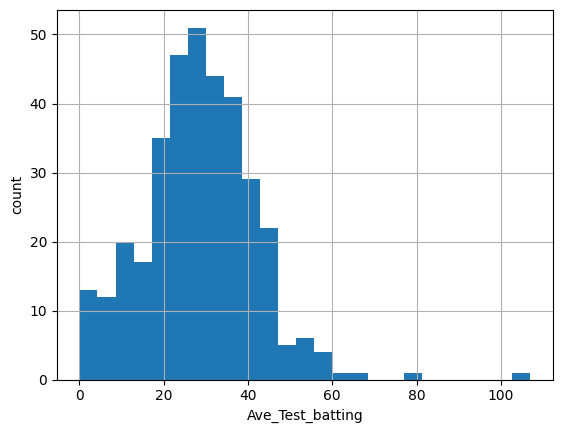

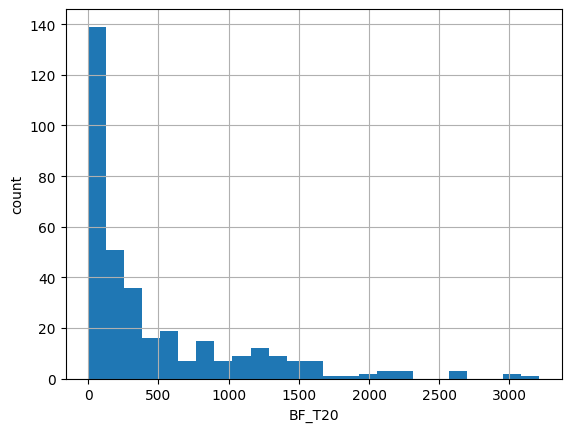

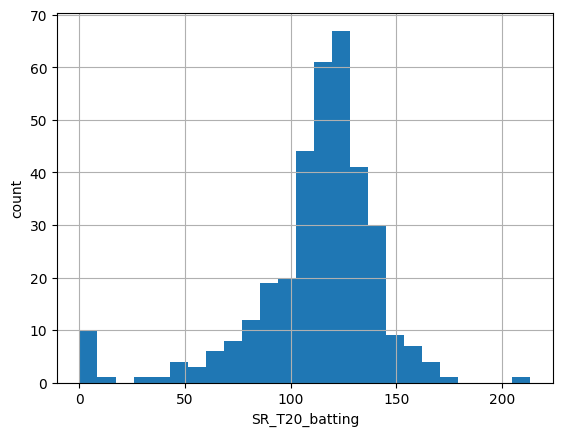

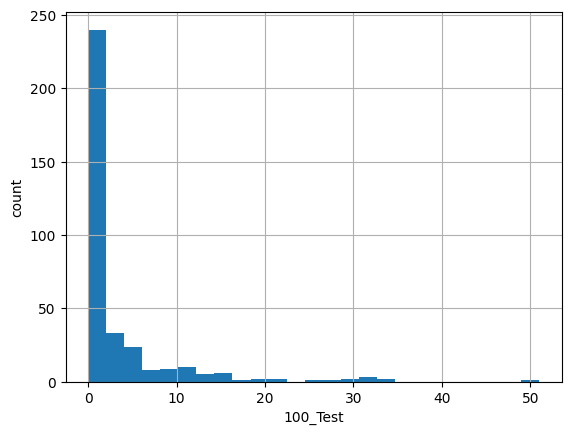

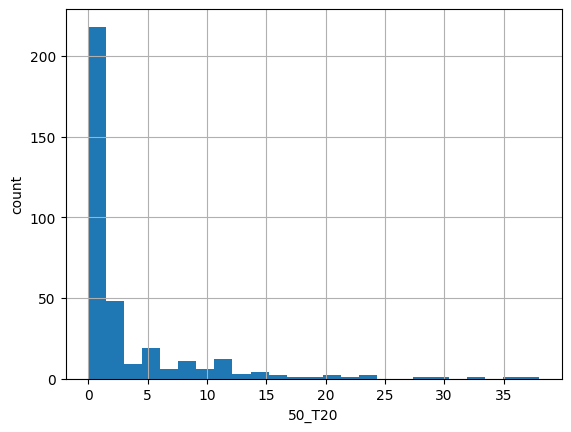

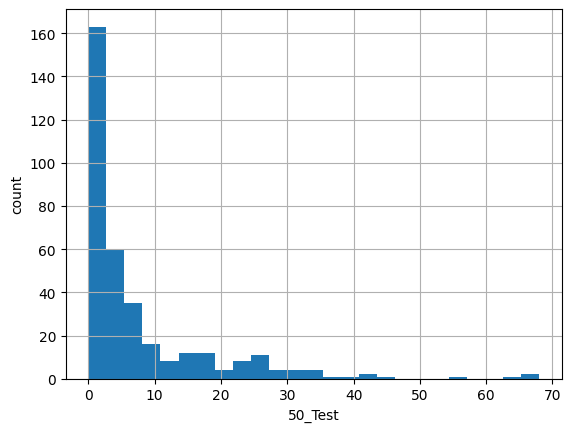

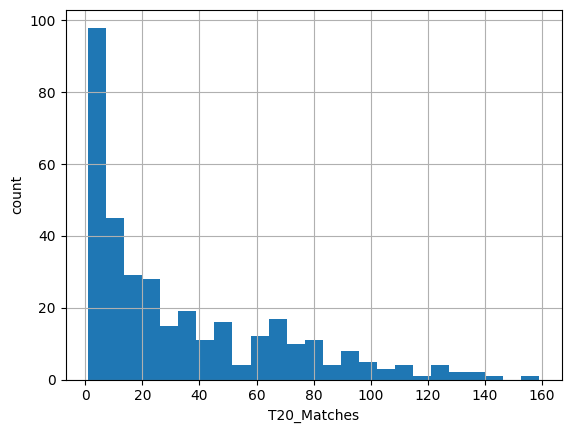

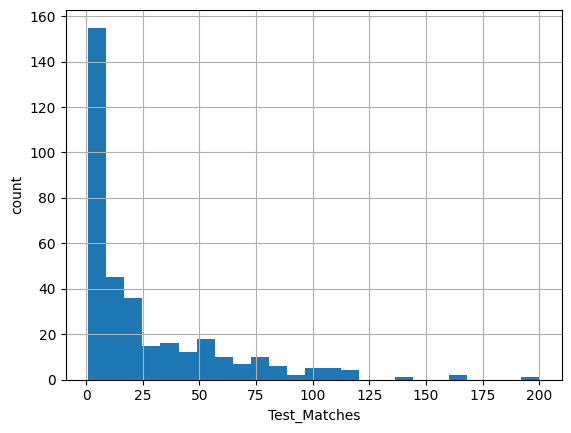

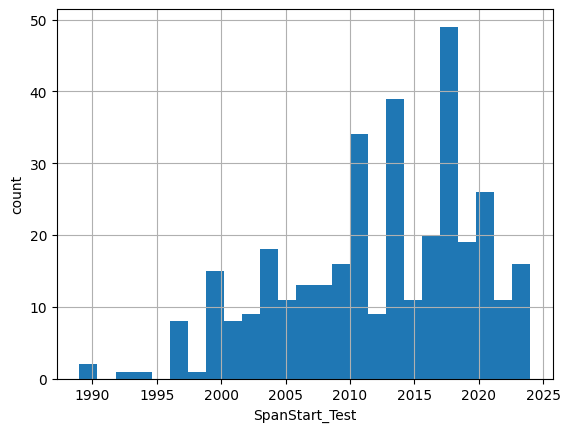

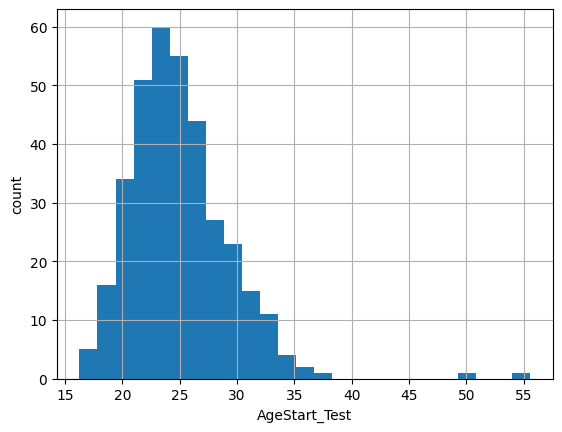

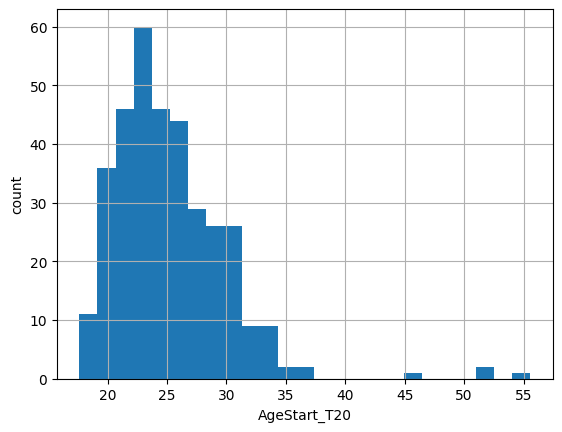

In [17]:
for feature in continuous_features:
    data = df_bat_odi.copy()
    
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

Continuous Features are slightly right skewed. Log transformation could be applied.
While discrete Features are Zero-inflated

### Categorical Features

In [18]:
cat_features = [feature for feature in df_bat_odi.columns if feature not in num_features]
df_bat_odi[cat_features].head()

,Player Name,Batting Style,Playing Role,Country
0,A Athanaze,Left hand Bat,Batter,WI
1,A Balbirnie,Right hand Bat,Batter,IRE
2,A Dananjaya,Left hand Bat,Allrounder,SL
3,A Symonds,Right hand Bat,Allrounder,AUS
4,AB Barath,Right hand Bat,Batter,WI


In [19]:
for feature in cat_features:
    print('{}: {} categories'.format(feature, len(df_bat_odi[feature].unique())))

Player Name: 350 categories
Batting Style: 2 categories
Playing Role: 2 categories
Country: 12 categories


In [21]:
cat_features.remove('Player Name')

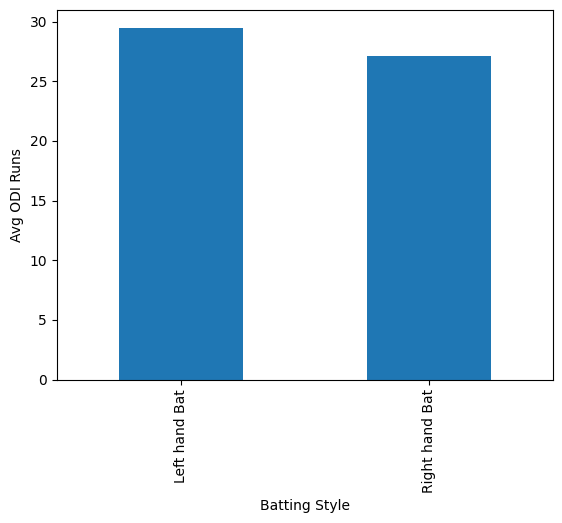

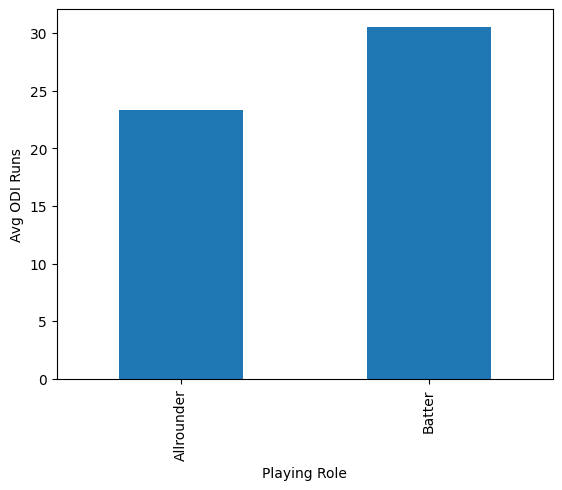

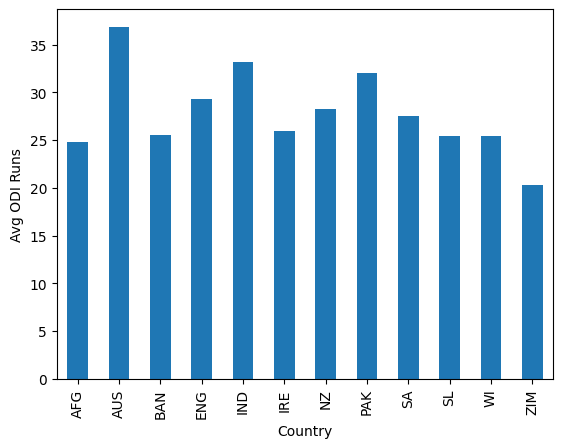

In [22]:
## relationship with Avg Runs

for feature in cat_features:
    data = df_bat_odi.copy()
    
    data.groupby(feature)['Ave_ODI_batting'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Avg ODI Runs')
    plt.show()

##### Observations:
1. Left handed batters have high Avgs
2. Batter have high averages in ODI as they bat ahead of Allrounders

#### Feature Engineering

In [101]:
dataset = df_bat_odi.copy()
dataset.head()

,Player Name,Batting Style,Playing Role,Innings_T20_batting,Innings_Test_batting,NO_T20,NO_Test,Runs_T20_batting,Runs_Test_batting,HS_T20,...,50_Test,0_T20,0_Test,T20_Matches,Test_Matches,Country,SpanStart_Test,SpanStart_T20,AgeStart_Test,AgeStart_T20
0,A Athanaze,Left hand Bat,Batter,1,13,1,0,6,310,6,...,1,0,1,1,7,WI,2023,2024,24.643836,25.643836
1,A Balbirnie,Right hand Bat,Batter,106,18,4,1,2392,401,83,...,4,6,3,110,9,IRE,2018,2015,27.586301,24.586301
2,A Dananjaya,Left hand Bat,Allrounder,16,10,8,2,65,135,11,...,0,2,3,33,6,SL,2018,2012,24.819178,18.819178
3,A Symonds,Right hand Bat,Allrounder,11,41,4,5,337,1462,85,...,10,2,4,14,26,AUS,2004,2005,29.080000,30.080000
4,AB Barath,Right hand Bat,Batter,2,28,0,0,23,657,15,...,4,0,2,2,15,WI,2009,2010,19.290411,20.290411


##### Converting Categorical features to Numerical features

In [102]:
for feature in cat_features:
    ordinal_labels = dataset.groupby(feature)['Ave_ODI_batting'].max().sort_values().index
    ordinal_dict = {k:i for i, k in enumerate(ordinal_labels, 0)}
    print(ordinal_dict)
    dataset[feature] = df_bat_odi[feature].map(ordinal_dict)

{'Left hand Bat': 0, 'Right hand Bat': 1}
{'Allrounder': 0, 'Batter': 1}
{'ZIM': 0, 'SL': 1, 'AFG': 2, 'AUS': 3, 'IRE': 4, 'WI': 5, 'SA': 6, 'NZ': 7, 'ENG': 8, 'PAK': 9, 'IND': 10, 'BAN': 11}


In [103]:
dataset.drop(['Player Name'], axis = 1, inplace = True)
dataset.head()

,Batting Style,Playing Role,Innings_T20_batting,Innings_Test_batting,NO_T20,NO_Test,Runs_T20_batting,Runs_Test_batting,HS_T20,HS_Test,...,50_Test,0_T20,0_Test,T20_Matches,Test_Matches,Country,SpanStart_Test,SpanStart_T20,AgeStart_Test,AgeStart_T20
0,0,1,1,13,1,0,6,310,6,82,...,1,0,1,1,7,5,2023,2024,24.643836,25.643836
1,1,1,106,18,4,1,2392,401,83,95,...,4,6,3,110,9,4,2018,2015,27.586301,24.586301
2,0,0,16,10,8,2,65,135,11,43,...,0,2,3,33,6,1,2018,2012,24.819178,18.819178
3,1,0,11,41,4,5,337,1462,85,162,...,10,2,4,14,26,3,2004,2005,29.080000,30.080000
4,1,1,2,28,0,0,23,657,15,104,...,4,0,2,2,15,5,2009,2010,19.290411,20.290411


In [27]:
dataset.to_csv('Data/Final/odi_bat_processed_data.csv', index = False)

#### Modelling

In [222]:
df = pd.read_csv('Data/Final/odi_bat_processed_data.csv')
df.head()

,Batting Style,Playing Role,Innings_T20_batting,Innings_Test_batting,NO_T20,NO_Test,Runs_T20_batting,Runs_Test_batting,HS_T20,HS_Test,...,50_Test,0_T20,0_Test,T20_Matches,Test_Matches,Country,SpanStart_Test,SpanStart_T20,AgeStart_Test,AgeStart_T20
0,0,1,1,13,1,0,6,310,6,82,...,1,0,1,1,7,5,2023,2024,24.643836,25.643836
1,1,1,106,18,4,1,2392,401,83,95,...,4,6,3,110,9,4,2018,2015,27.586301,24.586301
2,0,0,16,10,8,2,65,135,11,43,...,0,2,3,33,6,1,2018,2012,24.819178,18.819178
3,1,0,11,41,4,5,337,1462,85,162,...,10,2,4,14,26,3,2004,2005,29.080000,30.080000
4,1,1,2,28,0,0,23,657,15,104,...,4,0,2,2,15,5,2009,2010,19.290411,20.290411


In [223]:
X = df.drop('Ave_ODI_batting', axis = 1)

In [224]:
y = df['Ave_ODI_batting']

##### Dropping with correlation

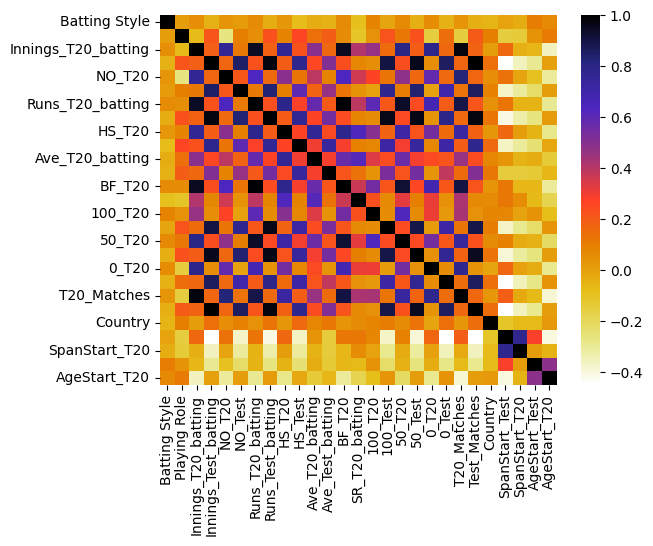

In [225]:
cor = X.corr()
sns.heatmap(cor, annot = False, cmap = plt.cm.CMRmap_r)
plt.show()

In [226]:
# Select upper triangle of correlation matrix
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))

In [227]:
# Find features with correlation greater than 0.8
highly_correlated = [column for column in upper.columns if any(upper[column] > 0.8)]

In [228]:
highly_correlated

['NO_Test',
 'Runs_T20_batting',
 'Runs_Test_batting',
 'BF_T20',
 '100_Test',
 '50_T20',
 '50_Test',
 '0_Test',
 'T20_Matches',
 'Test_Matches']

In [229]:
# Drop highly correlated features
X = X.drop(columns=highly_correlated)

#### Random Forest

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [115]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [116]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

In [117]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [118]:
print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R^2 Score: {r2_rf}')

Random Forest Mean Squared Error: 68.33449935800002
Random Forest R^2 Score: 0.3543769469456659


In [119]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

In [120]:
scores = cross_val_score(rf_model, X_train, y_train, cv=cv)
print(np.mean(scores))

0.36766982501577683


##### Inferencing with Shap

In [121]:
import shap

In [122]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

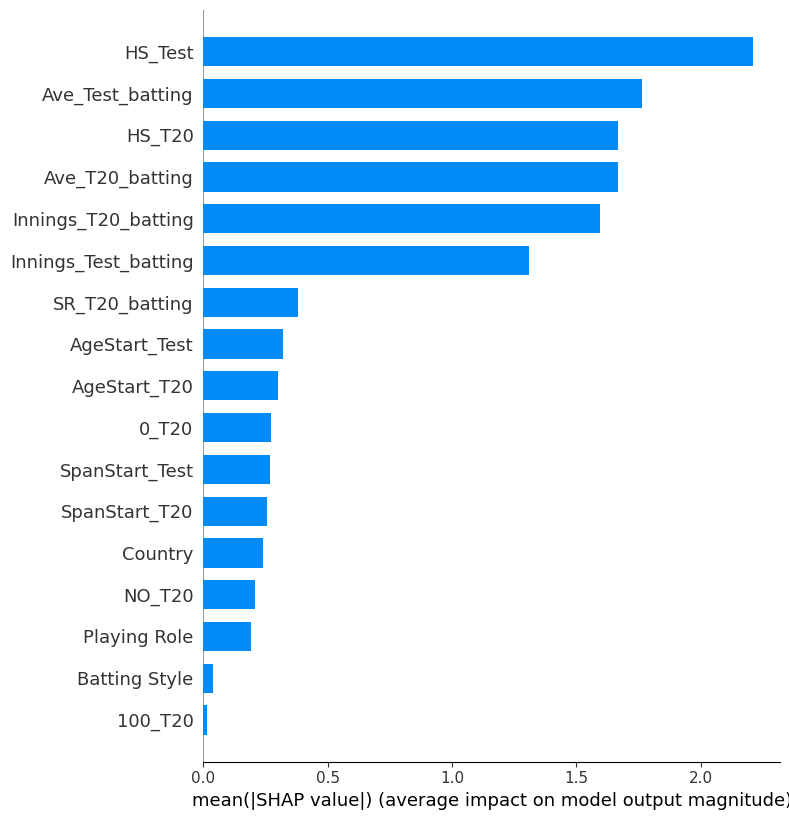

In [123]:
# Plot summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

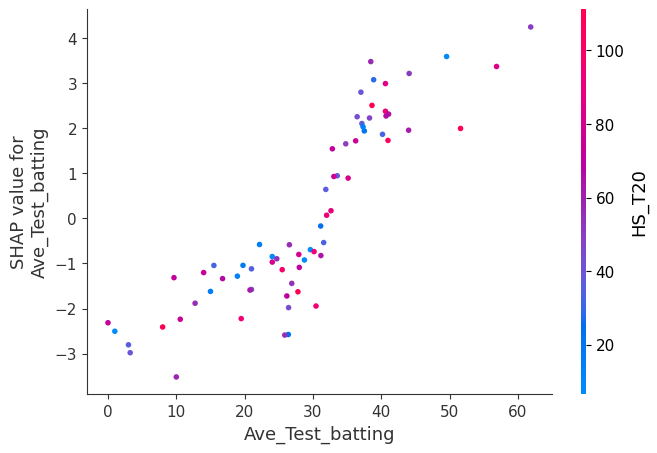

In [124]:
# Plot SHAP dependence plot for a specific feature
shap.dependence_plot("Ave_Test_batting", shap_values, X_test) 

##### Hyperparameter Tuning

In [126]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Random Hyperparameter Grid

In [127]:
from sklearn.model_selection import RandomizedSearchCV

In [136]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ["sqrt", "log2", None]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [137]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [138]:
rf = RandomForestRegressor()

In [139]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [140]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [141]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': True}

In [142]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mse = mean_squared_error(test_labels, predictions)
    accuracy = 100 - mse
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(mse))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [143]:
base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 68.3345 degrees.
Accuracy = 31.67%.


In [144]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 65.2099 degrees.
Accuracy = 34.79%.


In [146]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 9.87%.


Grid Search CV

In [147]:
from sklearn.model_selection import GridSearchCV

In [148]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [149]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [150]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


f:\College\Masters\Research\Cricket\cric\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [151]:

grid_search.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 100}

In [152]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 69.4565 degrees.
Accuracy = 30.54%.


In [153]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of -3.54%.


#### Neural Networks

In [154]:
from sklearn.preprocessing import StandardScaler

In [155]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [156]:
from sklearn.neural_network import MLPRegressor

In [210]:
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50, 20), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50, 20), max_iter=1000, random_state=42)

In [211]:
y_pred_nn = nn_model.predict(X_test)

In [212]:
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

In [213]:
print(f'Neural Network Mean Squared Error: {mse_nn}')
print(f'Neural Network R^2 Score: {r2_nn}')

Neural Network Mean Squared Error: 74.45101922334968
Neural Network R^2 Score: 0.29658818333965553


#### Hybird Model

In [334]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures
from sklearn.impute import SimpleImputer

In [246]:
zero_inflated = ['Innings_T20_batting', 'Innings_Test_batting', 'NO_T20']

In [247]:
skewed = ['HS_T20', 'HS_Test', 'Ave_T20_batting', 'Ave_Test_batting', 'SR_T20_batting','SpanStart_Test', 'AgeStart_Test', 'AgeStart_T20']

In [248]:
# Log transformation function
log_transformer = FunctionTransformer(np.log1p, validate=True)

In [257]:
# Binary indicator for zero-inflated features
def binary_indicator(df):
    return (df > 0).astype(int)

In [330]:
# Interaction and Polynomial Features
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [365]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('binary', FunctionTransformer(binary_indicator, validate=True), zero_inflated),
        ('log', log_transformer, skewed),
        ('scale', StandardScaler(), skewed + zero_inflated)
    ],
    remainder='passthrough'
)

In [332]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [352]:
# Define base models
base_models = [
    ('pr', PoissonRegressor()),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42)),
]

In [353]:
# Define meta-model
meta_model = RandomForestRegressor(random_state=42)

In [354]:
# Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

In [355]:
# Complete pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', stacking_model)
])

In [356]:
# Hyperparameter tuning
param_distributions = {
    'model__xgb__n_estimators': [50, 100, 150],
    'model__xgb__max_depth': [3, 5, 7],
    'model__xgb__learning_rate': [0.01, 0.1, 0.3],
    'model__final_estimator__n_estimators': [50, 100, 150],
    'model__final_estimator__max_depth': [None, 10, 20]
}

In [357]:
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=20, cv=3, scoring='neg_mean_squared_error', random_state=42)

In [358]:
# Fit the model
random_search.fit(X_train, y_train)

f:\College\Masters\Research\Cricket\cric\lib\site-packages\sklearn\linear_model\_linear_loss.py:295: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
f:\College\Masters\Research\Cricket\cric\lib\site-packages\sklearn\linear_model\_linear_loss.py:295: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
f:\College\Masters\Research\Cricket\cric\lib\site-packages\sklearn\linear_model\_linear_loss.py:295: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
f:\College\Masters\Research\Cricket\cric\lib\site-packages\sklearn\linear_model\_linear_loss.py:295: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
f:\College\Masters\Research\Cricket\cric\lib\site-packages\sklearn\linear_model\_linear_loss.py:295: Run

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('binary',
                                                                               FunctionTransformer(func=<function binary_indicator at 0x0000017EFCCC1750>,
                                                                                                   validate=True),
                                                                               ['Innings_T20_batting',
                                                                                'Innings_Test_batting',
                                                                                'NO_T20']),
                                                                              ('log',
                                                                               FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                                   validate=True),
                                                                               ['HS_T20',
                                                                                'H...
                                                                final_estimator=RandomForestRegressor(random_state=42)))]),
                   n_iter=20,
                   param_distributions={'model__final_estimator__max_depth': [None,
                                                                              10,
                                                                              20],
                                        'model__final_estimator__n_estimators': [50,
                                                                                 100,
                                                                                 150],
                                        'model__xgb__learning_rate': [0.01, 0.1,
                                                                      0.3],
                                        'model__xgb__max_depth': [3, 5, 7],
                                        'model__xgb__n_estimators': [50, 100,
                                                                     150]},
                   random_state=42, scoring='neg_mean_squared_error')

In [362]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [363]:
mse

np.float64(89.823694568)

In [364]:
r2

0.15134743843231313

In [348]:
# Predict and evaluate
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

In [323]:
# Fit the model
pipeline.fit(X_train, y_train)

f:\College\Masters\Research\Cricket\cric\lib\site-packages\sklearn\linear_model\_linear_loss.py:295: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
f:\College\Masters\Research\Cricket\cric\lib\site-packages\sklearn\linear_model\_glm\glm.py:283: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
f:\College\Masters\Research\Cricket\cric\lib\site-packages\sklearn\linear_model\_glm\glm.py:283: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result(

f:\College\Masters\Research\Cricket\cric\lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary',
                                                  FunctionTransformer(func=<function binary_indicator at 0x0000017EFCCC1750>,
                                                                      validate=True),
                                                  ['Innings_T20_batting',
                                                   'Innings_Test_batting',
                                                   'NO_T20']),
                                                 ('scale', StandardScaler(),
                                                  ['HS_T20', 'HS_Test',
                                                   'Ave_T20_batting',
                                                   'Ave_Test_batting',
                                                   'SR_T20_batting',
                                                   'SpanSta...
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...))],
                                   final_estimator=RandomForestRegressor(bootstrap=False,
                                                                         max_depth=70,
                                                                         max_features='log2',
                                                                         min_samples_leaf=2,
                                                                         min_samples_split=10,
                                                                         n_estimators=800)))])

In [324]:
y_pred_hybrid = pipeline.predict(X_test)

In [325]:
# Evaluate the model
mse_hybrid = mean_squared_error(y_test, y_pred_hybrid)
r2_hybrid = r2_score(y_test, y_pred_hybrid)

In [326]:
print(f'Hybrid Model Mean Squared Error: {mse_hybrid}')
print(f'Hybrid Model R^2 Score: {r2_hybrid}')

Hybrid Model Mean Squared Error: 126.36999957862152
Hybrid Model R^2 Score: -0.19394135771732968


In [273]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

In [274]:
scores = cross_val_score(pipeline, X_train, y_train, cv=cv)
print(np.mean(scores))

f:\College\Masters\Research\Cricket\cric\lib\site-packages\sklearn\linear_model\_glm\glm.py:283: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
f:\College\Masters\Research\Cricket\cric\lib\site-packages\sklearn\linear_model\_glm\glm.py:283: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
f:\College\Masters\Research\Cricket\cric\lib\site-packages\sklearn\linear_model\_glm\glm.py:283: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increa

0.17832084433960618


#### Deep Learning

In [366]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras_tuner import RandomSearch

ModuleNotFoundError: No module named 'tensorflow.python'

In [ ]:
# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
# Define the neural network model
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout1', min_value=0.0, max_value=0.5, step=0.1)))
    
    model.add(Dense(units=hp.Int('units2', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout2', min_value=0.0, max_value=0.5, step=0.1)))
    
    model.add(Dense(1, activation='linear'))
    
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
    
    return model

In [ ]:
# Use Keras Tuner for hyperparameter tuning
tuner = RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=20,
    executions_per_trial=3,
    directory='my_dir',
    project_name='cricket_performance'
)

In [ ]:
tuner.search(X_train, y_train, epochs=100, validation_split=0.2)

In [ ]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
# Evaluate the model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
mse, r2